## Steps:

1. Kitaiev Chain Hamiltonian

2. TFIM with spin chain on X direction and external field on Z

3. Jordan Weigner

4. Diagonalizing

5. Diagonalize with Particle hole symmetry


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.animation import FuncAnimation, FFMpegWriter
from matplotlib import rc
from matplotlib.colors import LinearSegmentedColormap as colormap
from IPython.display import HTML
import functions as f

rc('animation', ffmpeg_path='C:\\Program Files (x86)\\ffmpeg\\bin\\ffmpeg.exe')
fps = 3
FFwriter=FFMpegWriter(fps=fps, extra_args=['-vcodec', 'libx264'])



In [43]:
g0 = np.ones(n) * 0.1 + 10 * np.array([1 if 50<i<90 else 0 for i in range(n)])
H0 = f.jordan_weigner(2, g0)
e_values, e_states = np.linalg.eig(H0)
e_states = e_states.T
U = f.U(H0)


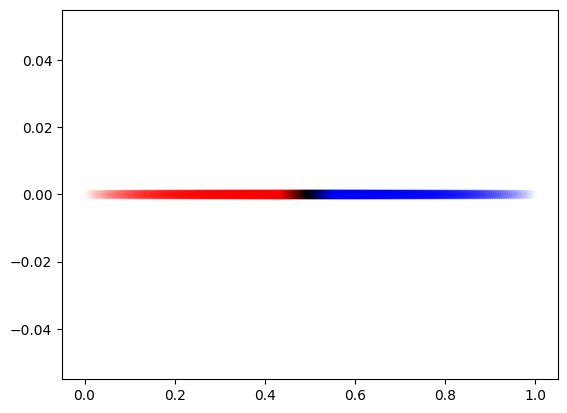

In [34]:
d = 0.06
values = [(0, np.array([1, 0, 0, 0])), (0.5 - d, np.array([1, 0, 0, 1])), (0.5, np.array([0, 0, 0, 1])), (00.5 + d, np.array([0, 0, 1, 1])), (1, np.array([0, 0, 1, 0]))]
def cmap(a):
    i = 0
    while (a > values[i][0]): i += 1
    if i > len(values): return values[i - 1][1]
    if i == 0: return values[0][1]
    k = (a - values[i - 1][0]) * 1.0 / (values[i][0] - values[i - 1][0])
    return values[i][1] * k + values[i - 1][1] * (1 - k)

x_range = np.linspace(0, 1, 200)
plt.scatter(x_range, x_range*0, c=[cmap(x) for x in x_range])

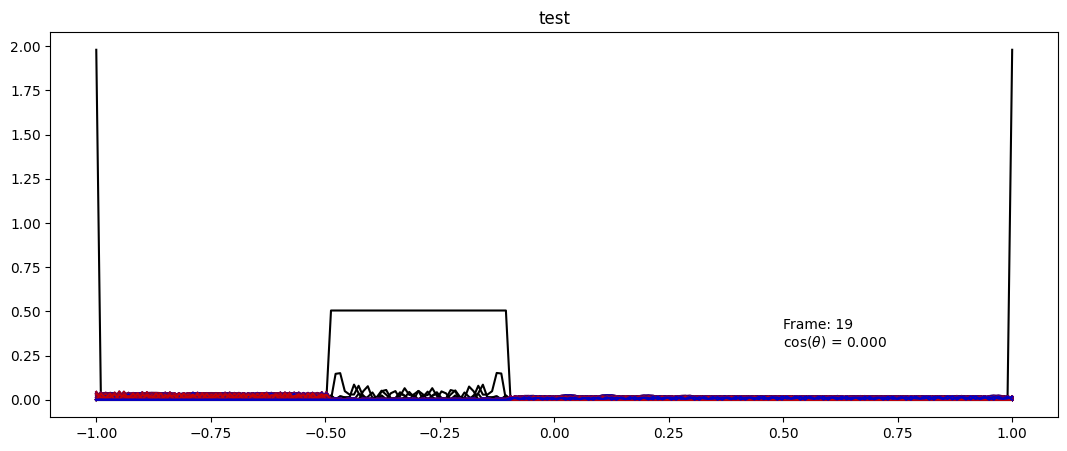

In [39]:
n = 200
def run_field_change(title, duration=1000):

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(13, 5)
    ax1.set_title(title)

    # Initial state
    base = np.ones(n) * 0.1
    wall = np.array([1 if 50<i<90 else 0 for i in range(n)])
    g = base + wall * 1
    g0 = base + wall * 10
    H0 = f.jordan_weigner(2, g0)
    H = f.jordan_weigner(2, g)
    U = f.U(H)

    x = np.linspace(-1, 1, len(H0[0]) // 2)
    gline, = ax1.plot(x, g0 / 20, 'black')
    e_values, e_states = np.linalg.eig(H0)
    e_states = e_states.T
    e_values, e_states = zip(*sorted(zip(e_values, e_states), key=lambda e: e[0] ** 2))
    e_states = np.array(e_states)
    dt = 1000 / fps

    


    plots = [None for _ in range(n * 2)]
    for i in range(n):
        plots[2 * i] = ax1.plot(x, np.absolute(f.project_phs_minus(e_states[i]) ** 2), c = cmap((e_values[i] - min(e_values)) / (max(e_values) - min(e_values))))[0]
        plots[2 * i + 1] = ax1.plot(x, np.absolute(f.project_phs_plus(e_states[i]) ** 2), c = cmap((e_values[i] - min(e_values)) / (max(e_values) - min(e_values))))[0]

    frame_text = ax1.text(0.5, 0.3, "0")

    def init(): return tuple(plots)

    def animate(frame):
        t = frame * dt
        
        Ut = U(t)

        states = e_states @ Ut.T
        
        for i in range(n):
            plots[2 * i].set_data(x, np.absolute(f.project_phs_minus(states[i]) ** 2))
            plots[2 * i + 1].set_data(x, np.absolute(f.project_phs_plus(states[i]) ** 2))    

        locshmidt_amp = np.absolute(np.linalg.det((e_states@Ut@e_states.T)[:n,:n]))**2

        frame_text.set_text(f"Frame: {frame}\ncos($\\theta$) = {locshmidt_amp:.3f}")
        return tuple(plots)
    
    anim = FuncAnimation(fig, animate, init_func=init,
                        frames = duration, interval = 30, blit = True)
    
    anim.save(f"simulations/{title}.mp4", writer=FFwriter)
run_field_change("test", 20)

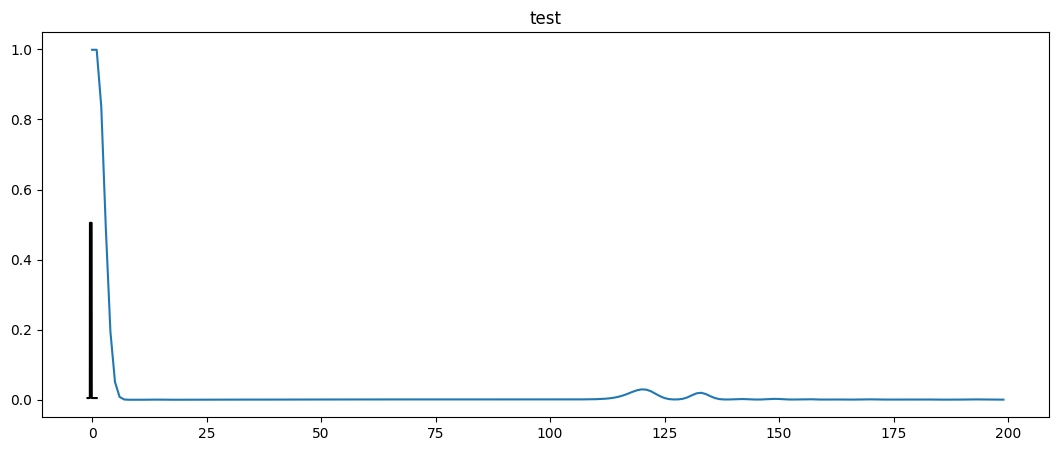

In [46]:
n = 200
def run_field_change(title, duration=1000):

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(13, 5)
    ax1.set_title(title)

    # Initial state
    base = np.ones(n) * 0.1
    wall = np.array([1 if 50<i<90 else 0 for i in range(n)])
    g = base + wall * 1
    g0 = base + wall * 10
    H0 = f.jordan_weigner(2, g0)
    H = f.jordan_weigner(2, g)
    U = f.U(H)

    x = np.linspace(-1, 1, len(H0[0]) // 2)
    gline, = ax1.plot(x, g0 / 20, 'black')
    e_values, e_states = np.linalg.eig(H0)
    e_states = e_states.T
    e_values, e_states = zip(*sorted(zip(e_values, e_states), key=lambda e: e[0] ** 2))
    e_states = np.array(e_states)
    dt = 0.5 / fps

    locshmidt_amp = []
    Ut = np.eye(2 * n)
    for i in range(duration):
        locshmidt_amp.append(np.absolute(np.linalg.det((e_states@Ut@e_states.T)[:n,:n]))**2)
        t = i * dt
        Ut = U(t)
    
    plt.plot(locshmidt_amp)
run_field_change("test", 200)

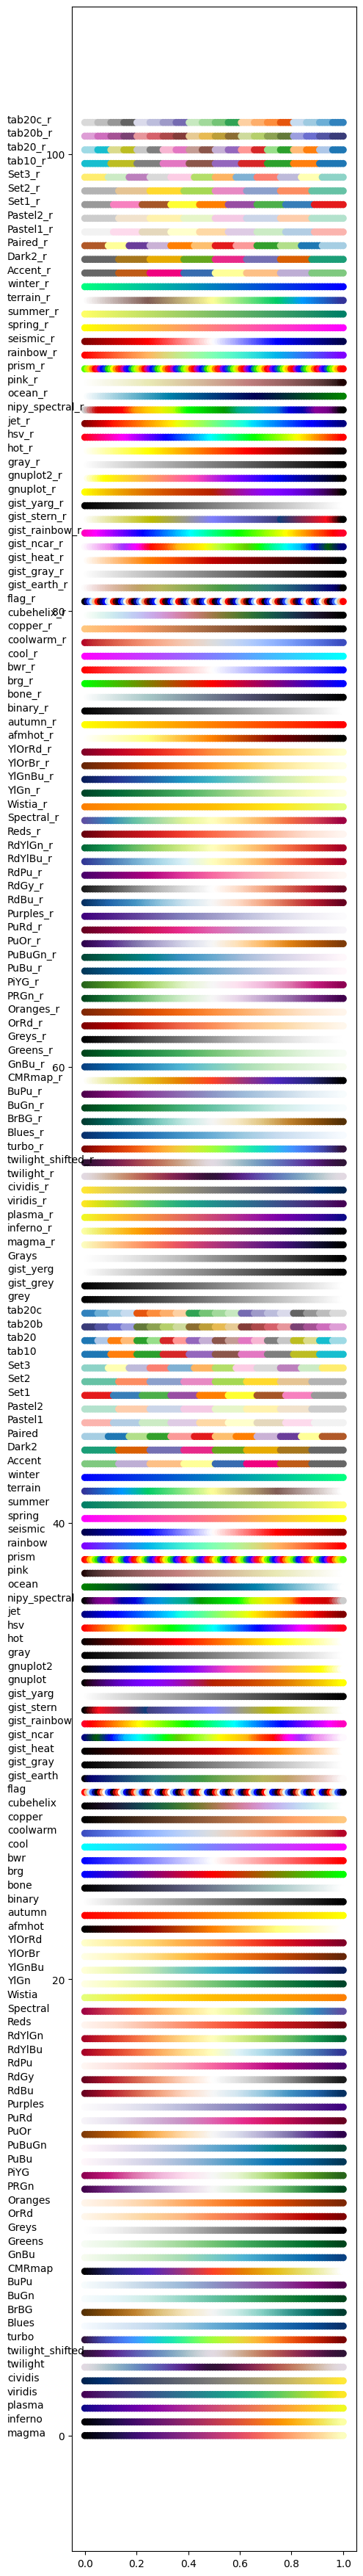

In [18]:
## CMAPs show

x_r = np.linspace(0, 1, 100)
for (i, c) in list(enumerate(plt.colormaps())):
    plt.scatter(x_r,x_r * 0 + i * 0.6,c=[plt.get_cmap(c)(x) for x in x_r])
    plt.text(-0.3, i * 0.6, c)
plt.gcf().set_size_inches(5, 45)

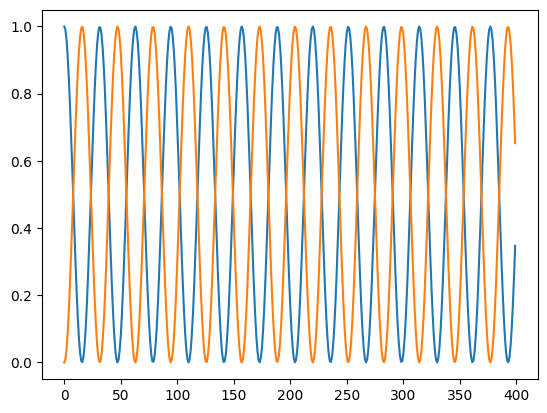

In [78]:
sx = np.ones((2, 2)) - np.eye(2)
U = f.U(sx)
n = 400
dt = 0.1
r = np.zeros((n, 2)).astype(complex)
si = np.array([1, 0]).astype(complex)
for i in range(n):
    r[i] = U(i * dt) @ si
plt.plot(np.absolute((r.T)[0])**2)
plt.plot(np.absolute((r.T)[1])**2)
